# Compare duplicate observations

In [114]:
from astropy.io import fits
from matplotlib import pyplot as plt
from astropy.table import Table
import os
import numpy as np
from scipy.stats import median_absolute_deviation as MAD

In [50]:
import collections


In [81]:
homedir = os.getenv("HOME")
tabledir = homedir+"/research/Virgo/halpha-tables/"

In [237]:
#dtab = Table.read(os.path.join(tabledir,"halphagui-output-combined-2023-Aug-24.fits"))
infile = os.path.join(tabledir,"halphagui-output-combined-2023-Aug-27.fits")
dtab = Table.read(infile)
print(len(dtab))

864


In [181]:
goodarea = dtab['ELLIP_UNMASKED_AREA']/dtab['ELLIP_TOTAL_AREA']
goodflag = (dtab['ELLIP_HRA'] > 0) & (dtab['HM16'] > 0)& (dtab['FILT_COR'] < 1.2)  & (goodarea > 0.5) & (dtab['M25'] > 0)
# these are likely halpha detections
htab = dtab[goodflag]
print(np.sum(goodflag))


613


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [182]:

duplist2 = ([item for item, count in collections.Counter(dtab['VFID']).items() if (count > 1)])
duplist3 = ([item for item, count in collections.Counter(dtab['VFID']).items() if count > 2])


hduplist2 = ([item for item, count in collections.Counter(htab['VFID']).items() if (count > 1)])
hduplist3 = ([item for item, count in collections.Counter(htab['VFID']).items() if count > 2])

fduplist2 = ([item for item, count in collections.Counter(ftab['VFID']).items() if (count > 1)])
fduplist3 = ([item for item, count in collections.Counter(ftab['VFID']).items() if count > 2])

In [154]:
print("number w/2 and 3 observations: ",len(duplist2),len(duplist3))
print("number of ha w/2 and 3 observations: ",len(hduplist2),len(hduplist3))

number w/2 and 3 observations:  159 23
number of ha w/2 and 3 observations:  103 12


In [165]:
print("number w/2 and 3 observations: ",len(duplist2),len(duplist3))
print("number of ha w/2 and 3 observations: ",len(hduplist2),len(hduplist3))

number w/2 and 3 observations:  159 23
number of ha w/2 and 3 observations:  103 13


/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


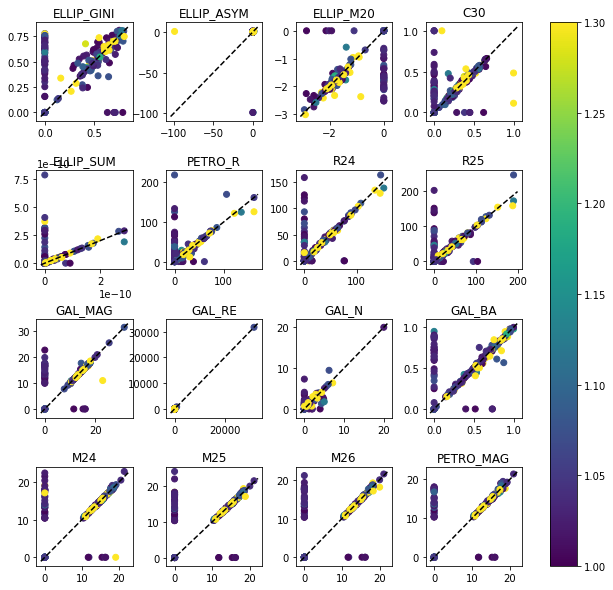

In [131]:
cols = ['ELLIP_GINI','ELLIP_ASYM','ELLIP_M20','C30',\
        'ELLIP_SUM','PETRO_R','R24','R25',\
        'GAL_MAG','GAL_RE','GAL_N','GAL_BA',\
        'M24','M25','M26','PETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
for c in cols:
    x1 = []
    x2 = []
    filtcor = []
    for vfid in duplist2:
        flag = dtab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(dtab))[flag]
            #print(dtab['VFID'][index])
            x1.append(dtab[c][index[0]])
            x2.append(dtab[c][index[1]])
            filtcor.append(np.max(dtab['FILT_COR'][index]))
    plt.subplot(4,4,nplot)
    plt.scatter(x1,x2,c=filtcor,vmin=1,vmax=1.3)

    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
plt.colorbar(ax=allax, fraction=0.08)

number with good r-band flag = 0.88 (756,864)
number of pairs = 132
number of pairs = 132
number of pairs = 132
number of pairs = 132
number of pairs = 132
number of pairs = 132
number of pairs = 132
number of pairs = 132
number of pairs = 132
number of pairs = 132
number of pairs = 132
number of pairs = 132
number of pairs = 132
number of pairs = 132
number of pairs = 132
number of pairs = 132


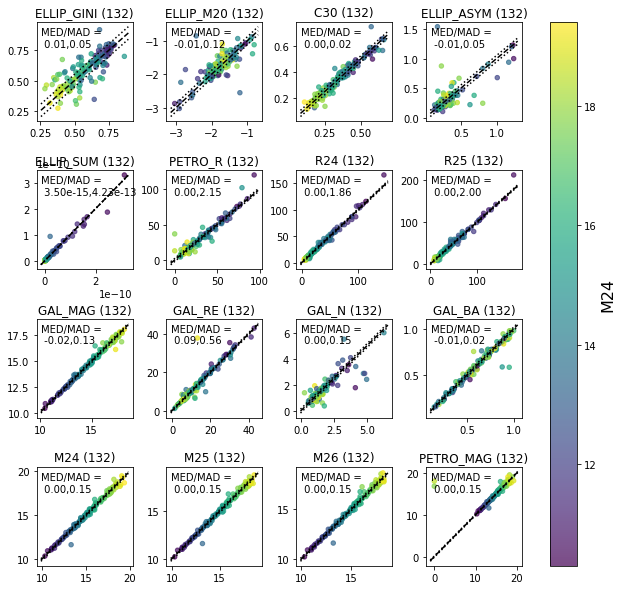

In [374]:
cols = ['ELLIP_GINI','ELLIP_M20','C30','ELLIP_ASYM',\
        'ELLIP_SUM','PETRO_R','R24','R25',\
        'GAL_MAG','GAL_RE','GAL_N','GAL_BA',\
        'M24','M25','M26','PETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)

eflag = (dtab['M26'] > 10)& (dtab['M24'] <20) & (dtab['C30'] < 1) & (dtab['GAL_RE'] < 50) & (dtab['GAL_MAG'] < 20)  & (dtab['GAL_N'] < 8) & (dtab['ELLIP_ASYM'] > -90)
etab = dtab[eflag]
print(f"number with good r-band flag = {np.sum(eflag)/len(dtab):.2f} ({np.sum(eflag)},{len(dtab)})")
eduplist2 = ([item for item, count in collections.Counter(etab['VFID']).items() if (count > 1)])
nplot = 1
allax = []

for c in cols:
    npair = 0
    x1 = []
    x2 = []
    dx = []
    filtcor = []
    for vfid in eduplist2:
        flag = etab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(etab))[flag]
            #print(dtab['VFID'][index])
            x1.append(etab[c][index[0]])
            x2.append(etab[c][index[1]])
            dx.append(etab[c][index[1]] - etab[c][index[0]])
            filtcor.append(np.max(etab['M24'][index[0]]))
            npair += 1
    plt.subplot(4,4,nplot)
    
    plt.scatter(x1,x2,c=filtcor,s=20,alpha=.7)#,vmin=1,vmax=1.3)

    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    #plt.title(c)
    plt.title(f"{c} ({npair})")
    allax.append(plt.gca())
    med = np.nanmedian(dx)
    mad =MAD(dx)
    #mad = np.nanstd(dx)
    if nplot == 5:
        plt.text(0.05,0.95,f"MED/MAD =\n {med:.2e},{mad:.2e}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
    else:
        plt.text(0.05,0.95,f"MED/MAD =\n {med:.2f},{mad:.2f}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
    print(f"number of pairs = {npair}")
    plt.plot(xline,xline+mad,'k:')
    plt.plot(xline,xline-mad,'k:')
    nplot += 1
cb = plt.colorbar(ax=allax, fraction=0.08)
cb.set_label("M24",fontsize=16)

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


number with good r-band flag = 0.63 (548,864)
1 HM16
number of pairs = 80
2 HM17
number of pairs = 80
3 ELLIP_HGINI
number of pairs = 80
4 HC30
number of pairs = 80
5 HR16
number of pairs = 80
6 HR17
number of pairs = 80
7 ELLIP_HM20
number of pairs = 80
8 ELLIP_HASYM
number of pairs = 80


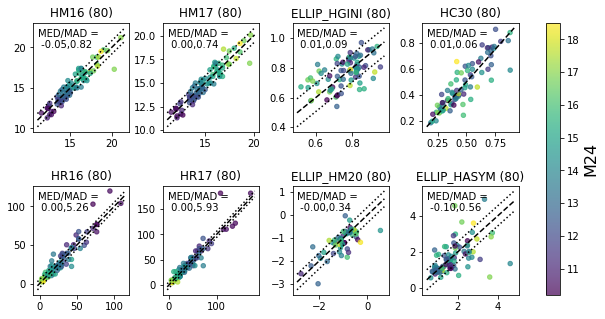

In [377]:
cols = ['HM16','HM17','HPETRO_MAG','ELLIP_HSUM_MAG',\
        'HPETRO_R','HR16','HR17',\
        'ELLIP_HGINI','ELLIP_HASYM','ELLIP_HM20','HC30']

cols = ['HM16','HM17','ELLIP_HGINI','HC30',\
        'HR16','HR17','ELLIP_HM20','ELLIP_HASYM']
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=.5,wspace=.35)

#eflag = (dtab['M24'] > 0)&(dtab['HM16'] > 0)& (dtab['HM17'] >0) & (dtab['HC30'] < 1) &(dtab['ELLIP_HASYM'] > -10)&(dtab['ELLIP_HASYM'] < 5) &  (dtab['ELLIP_HGINI'] > 0)  &  (dtab['ELLIP_HGINI']< 1)&\
#(dtab['HPETRO_R'] < 100) & (dtab['HPETRO_MAG'] > 0)

eflag = (dtab['M24'] > 0)&(dtab['HM16'] > 0)& (dtab['HM17'] >0) & (dtab['HC30'] < 1) &(dtab['ELLIP_HASYM'] > -10)&(dtab['ELLIP_HASYM'] < 5) \
&  (dtab['ELLIP_HGINI'] > 0)  &  (dtab['ELLIP_HGINI']< 1) & (dtab['HR17'] < 200)



#eflag = np.ones(len(dtab),'bool')
etab = dtab[eflag]
print(f"number with good r-band flag = {np.sum(eflag)/len(dtab):.2f} ({np.sum(eflag)},{len(dtab)})")
eduplist2 = ([item for item, count in collections.Counter(etab['VFID']).items() if (count > 1)])
nplot = 1
allax = []

for c in cols:
    npair = 0
    x1 = []
    x2 = []
    dx = []
    filtcor = []
    for vfid in eduplist2:
        flag = etab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(etab))[flag]
            #print(dtab['VFID'][index])
            x1.append(etab[c][index[0]])
            x2.append(etab[c][index[1]])
            dx.append(etab[c][index[1]] - etab[c][index[0]])
            filtcor.append(np.max(etab['M24'][index[0]]))
            npair += 1
    print(nplot,c)
    plt.subplot(2,4,nplot)
    
    plt.scatter(x1,x2,c=filtcor,s=20,alpha=.7)#,vmin=1,vmax=1.3)

    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    #plt.title(c)
    plt.title(f"{c} ({npair})")
    allax.append(plt.gca())
    med = np.nanmedian(dx)
    mad = MAD(dx,nan_policy="omit")
    #mad = np.nanstd(dx)
    if nplot == 4:
        #plt.gca().set_xscale('log')
        #plt.gca().set_yscale('log')
        plt.text(0.05,0.95,f"MED/MAD =\n {med:.2f},{mad:.2f}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
    else:
        plt.text(0.05,0.95,f"MED/MAD =\n {med:.2f},{mad:.2f}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
        plt.plot(xline,xline+mad,'k:')
        plt.plot(xline,xline-mad,'k:')
    print(f"number of pairs = {npair}")
    if nplot == 7:
        nplot += 1
    else:
        nplot += 1
cb = plt.colorbar(ax=allax, fraction=0.08)
cb.set_label("M24",fontsize=16)

# R-band measurements for "Halpha" sample

/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


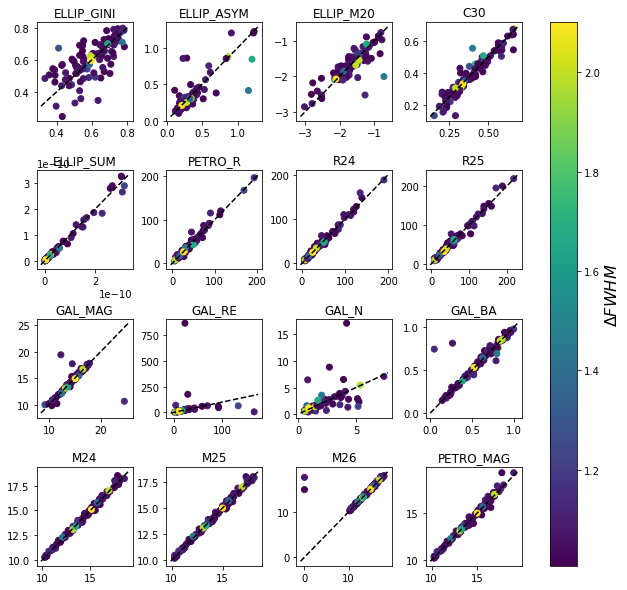

In [161]:
cols = ['ELLIP_GINI','ELLIP_ASYM','ELLIP_M20','C30',\
        'ELLIP_SUM','PETRO_R','R24','R25',\
        'GAL_MAG','GAL_RE','GAL_N','GAL_BA',\
        'M24','M25','M26','PETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
for c in cols:
    x1 = []
    x2 = []
    filtcor = []
    for vfid in hduplist2:
        flag = htab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(htab))[flag]
            #print(dtab['VFID'][index])
            if ('ASYM' in c) & ((htab['ELLIP_ASYM'][index[0]] < 0) |(htab['ELLIP_ASYM'][index[1]] < 0)) :
                continue
            x1.append(htab[c][index[0]])
            x2.append(htab[c][index[1]])
            filtcor.append(np.max(htab['FILT_COR'][index]))
            #filtcor.append(np.abs(htab['R_FWHM'][index[0]] -htab['R_FWHM'][index[1]]))
    plt.subplot(4,4,nplot)
    plt.scatter(x1,x2,c=filtcor)#,vmin=1,vmax=1.3)

    xmin,xmax = plt.xlim()
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
cb = plt.colorbar(ax=allax, fraction=0.08)
#cb.set_label("Mag_SB25",size=16)
cb.set_label(r"$\Delta FWHM$",size=16)

/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


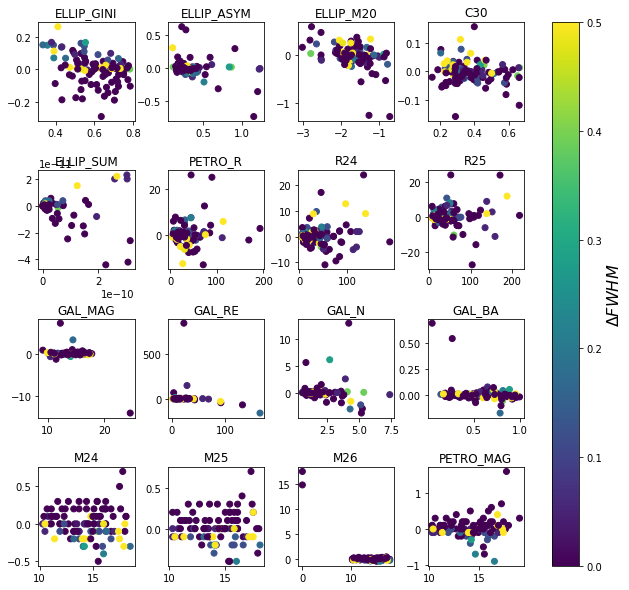

In [158]:
cols = ['ELLIP_GINI','ELLIP_ASYM','ELLIP_M20','C30',\
        'ELLIP_SUM','PETRO_R','R24','R25',\
        'GAL_MAG','GAL_RE','GAL_N','GAL_BA',\
        'M24','M25','M26','PETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
for c in cols:
    x1 = []
    x2 = []
    color = []
    dx = []
    for vfid in hduplist2:
        flag = htab['VFID'] == vfid
        if np.sum(flag) > 1:
            index = np.arange(len(htab))[flag]
            #print(dtab['VFID'][index])
            if ('ASYM' in c) & ((htab['ELLIP_ASYM'][index[0]] < 0) |(htab['ELLIP_ASYM'][index[1]] < 0)) :
                continue
            x1.append(htab[c][index[0]])
            x2.append(htab[c][index[1]])
            color.append(htab['R_FWHM'][index[0]]-htab['R_FWHM'][index[1]])
            dx.append(htab[c][index[1]]-htab[c][index[0]])
            #filtcor.append(np.abs(htab['R_FWHM'][index[0]] -htab['R_FWHM'][index[1]]))
    plt.subplot(4,4,nplot)
    #plt.scatter(x1,x2,c=filtcor)#,vmin=1,vmax=1.3)
    plt.scatter(x1,dx,c=color,vmin=0,vmax=.5)

    xmin,xmax = plt.xlim()
    #xline = np.linspace(xmin,xmax,100)
    #plt.plot(xline,xline,'k--')
    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
cb = plt.colorbar(ax=allax, fraction=0.08)
#cb.set_label("Mag_SB25",size=16)
cb.set_label(r"$\Delta FWHM$",size=16)

ELLIP_HGINI: MED/MAD = 0.02,0.12
ELLIP_HASYM: MED/MAD = -0.10,0.66
ELLIP_HM20: MED/MAD = -0.04,nan
HC30: MED/MAD = 0.00,0.08
ELLIP_HSUM: MED/MAD = 0.00,0.00
HPETRO_R: MED/MAD = 0.55,8.08


/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:138: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


HR16: MED/MAD = 0.00,5.63
HR17: MED/MAD = 0.00,5.93
HM16: MED/MAD = -0.10,1.04
HM17: MED/MAD = -0.10,1.04
HF_TOT: MED/MAD = 0.00,0.00
HPETRO_MAG: MED/MAD = 0.00,nan


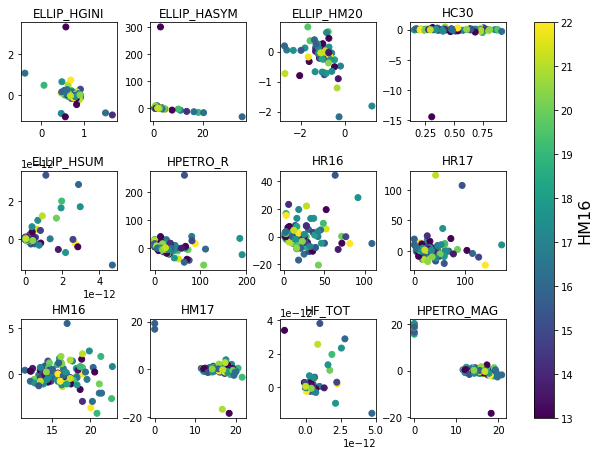

In [159]:
cols = ['ELLIP_HGINI','ELLIP_HASYM','ELLIP_HM20','HC30',\
        'ELLIP_HSUM','HPETRO_R','HR16','HR17',\
        'HM16','HM17','HF_TOT','HPETRO_MAG']
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
for i,c in enumerate(cols):
    x1 = []
    x2 = []
    dx = []
    color = []
    for vfid in hduplist2:
        flag = htab['VFID'] == vfid
        
        if np.sum(flag) > 1:
            index = np.arange(len(htab))[flag]
            if ('ASYM' in c) & ((htab['ELLIP_HASYM'][index[0]] < 0) |(htab['ELLIP_HASYM'][index[1]] < 0)) :
                continue
            
            #print(dtab['VFID'][index])
            x1.append(htab[c][index[0]])
            x2.append(htab[c][index[1]])
            dx.append(htab[c][index[1]]-htab[c][index[0]])
            color.append(np.max(dtab['HM16'][index]))
            #color.append(np.max(htab['FILT_COR'][index]))
        
    plt.subplot(4,4,nplot)
    #plt.scatter(x1,x2,c=color,vmin=1,vmax=1.3)
    #plt.scatter(x1,x2,c=color,vmin=13,vmax=22)
    plt.scatter(x1,dx,c=color,vmin=13,vmax=22)
    #if nplot == 1:
    #    plt.axis([0.4,1.2,0.4,1.2])
    xmin,xmax = plt.xlim()
    #plt.ylim(0,2)
    #xline = np.linspace(xmin,xmax,100)
    #plt.plot(xline,xline,'k--')
    plt.title(c)
    nplot += 1
    allax.append(plt.gca())
    print(f"{c}: MED/MAD = {np.nanmedian(dx):.2f},{MAD(dx):.2f}")
cb = plt.colorbar(ax=allax, fraction=0.08)
cb.set_label(label="HM16",size=16)

# STATMORPH

number with good statmorph flag = 0.66 (570,864)
npairs =  83
npairs =  83
npairs =  83
npairs =  83
npairs =  83


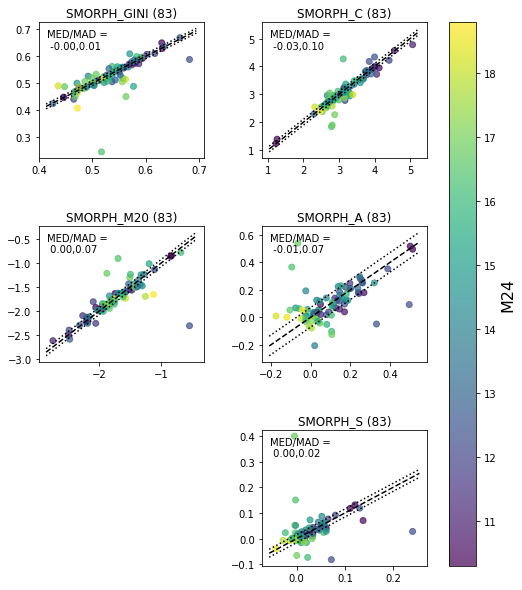

In [372]:
cols = ['SMORPH_GINI','SMORPH_M20','SMORPH_C','SMORPH_A','SMORPH_S']
positions = [1,3,2,4,6]
plt.figure(figsize=(8,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
sflag = (dtab['SMORPH_XCENTROID'] > 0) & (dtab['SMORPH_S'] > -.1)
stab = dtab[sflag]
print(f"number with good statmorph flag = {np.sum(sflag)/len(dtab):.2f} ({np.sum(sflag)},{len(dtab)})")
sduplist2 = ([item for item, count in collections.Counter(stab['VFID']).items() if (count > 1)])
for i,c in enumerate(cols):
    x1 = []
    x2 = []
    dx = []
    color = []
    npair = 0
    for vfid in sduplist2:
        flag = stab['VFID'] == vfid
        
        if np.sum(flag) > 1:
            index = np.arange(len(stab))[flag]
            #flag = htab['SMORPH_XCENTROID'] == 0
            
            #print(dtab['VFID'][index])
            x1.append(stab[c][index[0]])
            x2.append(stab[c][index[1]])
            dx.append(stab[c][index[1]]-stab[c][index[0]])
            color.append(np.max(stab['M24'][index]))
            #color.append(np.max(htab['FILT_COR'][index]))
            npair += 1
    print("npairs = ",npair)
    plt.subplot(3,2,positions[i])
    #plt.scatter(x1,x2,c=color,vmin=1,vmax=1.3)
    #plt.scatter(x1,x2,c=color,vmin=13,vmax=22)
    plt.scatter(x1,x2,c=color,alpha=.7)
    #if nplot == 1:
    #    plt.axis([0.4,1.2,0.4,1.2])
    xmin,xmax = plt.xlim()
    #plt.ylim(0,2)
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    plt.title(f"{c} ({npair})")
    nplot += 1
    allax.append(plt.gca())
    med = np.nanmedian(dx)
    mad = MAD(dx)
    
    plt.text(0.05,0.95,f"MED/MAD =\n {med:.2f},{mad:.2f}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
    plt.plot(xline,xline+mad,'k:')
    plt.plot(xline,xline-mad,'k:')
cb = plt.colorbar(ax=allax, fraction=0.08)
cb.set_label(label="M24",size=16)

number with good statmorph flag = 0.59 (514,864)
npairs =  70
npairs =  70
npairs =  70
npairs =  70
npairs =  70


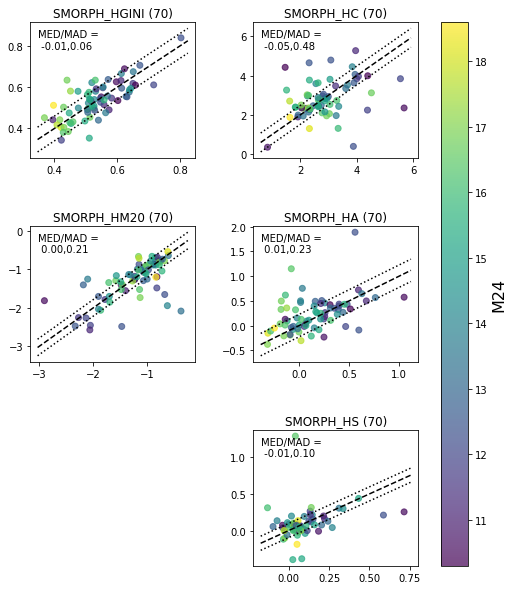

In [376]:
cols = ['SMORPH_HGINI','SMORPH_HM20','SMORPH_HC','SMORPH_HA','SMORPH_HS']
positions = [1,3,2,4,6]
plt.figure(figsize=(8,10))
plt.subplots_adjust(hspace=.5,wspace=.35)
nplot = 1
allax = []
sflag = (dtab['SMORPH_HXCENTROID'] > 0) & (dtab['SMORPH_S'] > -.1) &(dtab['SMORPH_HGINI'] > -90) &(dtab['SMORPH_HM20'] > -90) &(dtab['SMORPH_HS'] > -.5)
stab = dtab[sflag]
print(f"number with good statmorph flag = {np.sum(sflag)/len(dtab):.2f} ({np.sum(sflag)},{len(dtab)})")
sduplist2 = ([item for item, count in collections.Counter(stab['VFID']).items() if (count > 1)])
for i,c in enumerate(cols):
    x1 = []
    x2 = []
    dx = []
    color = []
    npair = 0
    for vfid in sduplist2:
        flag = stab['VFID'] == vfid
        
        if np.sum(flag) > 1:
            index = np.arange(len(stab))[flag]
            #flag = htab['SMORPH_XCENTROID'] == 0
            
            #print(dtab['VFID'][index])
            x1.append(stab[c][index[0]])
            x2.append(stab[c][index[1]])
            dx.append(stab[c][index[1]]-stab[c][index[0]])
            color.append(np.max(stab['M24'][index]))
            #color.append(np.max(htab['FILT_COR'][index]))
            npair += 1
    print("npairs = ",npair)
    plt.subplot(3,2,positions[i])
    #plt.scatter(x1,x2,c=color,vmin=1,vmax=1.3)
    #plt.scatter(x1,x2,c=color,vmin=13,vmax=22)
    plt.scatter(x1,x2,c=color,alpha=.7)
    #if nplot == 1:
    #    plt.axis([0.4,1.2,0.4,1.2])
    xmin,xmax = plt.xlim()
    #plt.ylim(0,2)
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,xline,'k--')
    #plt.title(c)
    plt.title(f"{c} ({npair})")
    nplot += 1
    allax.append(plt.gca())
    med = np.nanmedian(dx)
    mad = MAD(dx)
    
    plt.text(0.05,0.95,f"MED/MAD =\n {med:.2f},{mad:.2f}",transform=plt.gca().transAxes,horizontalalignment="left",verticalalignment='top',fontsize=10)
    plt.plot(xline,xline+mad,'k:')
    plt.plot(xline,xline-mad,'k:')
cb = plt.colorbar(ax=allax, fraction=0.08)
cb.set_label(label="M24",size=16)

(array([247.,   0.,   0.,  95.,   0.,   0., 237.,   0.,   0.,  74.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

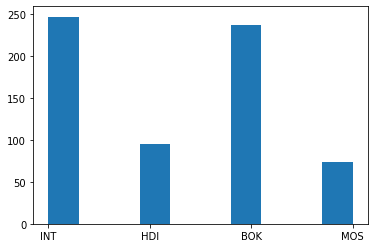

In [160]:
plt.hist(htab['TEL'])

# REMOVING DUPLICATES: How to select best galaxy?

NEED TO REMOVE DUPLICATE ROWS
could give preference to galaxies that have
- more measurements reported: GALFIT, ELLIP, SMORPH
- lower filter correction
- better seeing
- lower sky noise
- better coverage on CCD (like not near edge) - but I don't really track this...
 - maybe a square image vs rectangle?


In [238]:
ftab = dtab#[(dtab['FILT_COR'] < 1.2)]
fduplist = ([item for item, count in collections.Counter(ftab['VFID']).items() if (count > 1)])

In [239]:
galfit_flag = np.array(ftab['GAL_MAG'] > 0.,'i')
ephot_flag = np.array((ftab['ELLIP_XCENTROID'] > 0),'i')
rad_flag = np.array((ftab['R24'] > 0),'i')
morph_flag = np.array((ftab['ELLIP_M20'] > 0),'i')
smorph_flag = np.array(ftab['SMORPH_XCENTROID'] > 0,'i')
#goodarea = dtab['ELLIP_UNMASKED_AREA']/dtab['ELLIP_TOTAL_AREA']
ephot_hflag = np.array((ftab['ELLIP_HRA'] > 0) & (ftab['HM16'] > 0),'i')
rad_hflag = np.array((ftab['HR16'] > 0),'i')
morph_hflag = np.array((ftab['ELLIP_HM20'] > 0),'i')
smorph_hflag = np.array(ftab['SMORPH_HXCENTROID'] > 0,'i')
# should compare two values
filter_flag = (ftab['FILT_COR']< 1.1)

In [240]:
from scipy import stats

In [241]:
t = [1,2,3,4,5,5]
m = stats.mode(t)
print(m[1][0])

2


In [242]:
# allpointing = ftab['POINTING']
tocut = []
neasy = 0
for vfid in fduplist:
    # find the rows in the dtab
    matchrows = ftab['VFID'] == vfid
    matchindex = np.arange(len(ftab))[matchrows]
    print()
    print(vfid)
    print()
    rflags = []
    hflags = []
    filtcor = []
    pointing = []
    rfwhm = []
    hfwhm = []
    rskynoise = []
    hskynoise = []
    for i in matchindex:
        rflags.append(np.sum(galfit_flag[i] + ephot_flag[i] + rad_flag[i] + morph_flag[i]+smorph_flag[i]))
        hflags.append(np.sum(ephot_hflag[i] + rad_hflag[i] + morph_hflag[i]+smorph_hflag[i]))
        filtcor.append(ftab['FILT_COR'][i])
        pointing.append(ftab['POINTING'][i])
        rfwhm.append(ftab['R_FWHM'][i])
        hfwhm.append(ftab['H_FWHM'][i])
        rskynoise.append(np.log10(ftab['R_SKYNOISE'][i]))
        hskynoise.append(np.log10(ftab['H_SKYNOISE'][i]))
    # pick the winner
    rwin = matchindex[np.where(rflags == np.max(rflags))] 
    hwin = matchindex[np.where(hflags == np.max(hflags))] 
    fwin = matchindex[np.where(filtcor == np.min(filtcor))]
    
    rim = matchindex[np.where(rfwhm == np.min(rfwhm))] 
    him = matchindex[np.where(hfwhm == np.min(hfwhm))] 
    rnoise = matchindex[np.where(rskynoise == np.min(rskynoise))] 
    hnoise = matchindex[np.where(hskynoise == np.min(hskynoise))] 
    
    # check filter correction - if one is 5% smaller, keep this image
    if (len(fwin) == 1) & (len(filtcor) == 2):
        if np.abs(filtcor[1] - filtcor[0]) > 0.05:
            # winner is image with smaller filter cor??
            print("\t\t Winner by filter correction = ",ftab['POINTING'][fwin[0]])
            for m in matchindex:
                if m == fwin[0]:
                    continue
                else:
                    tocut.append(m)
            neasy += 1
            continue
    
    # if analysis flags are the same, pick image with best seeing
    if (len(rwin) > 1) & (len(hwin) > 1) & (len(him) == 1):
        print("\t\t Winner by image quality = ",ftab['POINTING'][him[0]])
        neasy += 1
        for m in matchindex:
            if m == him[0]:
                continue
            else:
                tocut.append(m)
        continue
    mode = stats.mode(np.array(listofwinners))
    if mode[1][0] > 1:
        print("\t\t Overall winner by mode ",ftab['POINTING'][mode[0][0]])
        neasy += 1
        for m in matchindex:
            if m == mode[0][0]:
                continue
            else:
                tocut.append(m)
        continue
                                                     
    for w in winners:
        if len(w) < 2:
            print("\t",ftab['POINTING'][w[0]])
    print("\trflags:", rflags)
    print("\thflags:", hflags)
    print("\tfilt cor:", filtcor)
    print("\tpointing:",pointing)
    #print(f"\tR FWHM: {rfwhm:.2f}")
    #print(f"\tH FWHM: {hfwhm:.2f}")
    #print(f"\tR skynoise: {rskynoise:.2f}")
    #print(f"\tH skynoise: {hskynoise:.2f}")
    print(f"\tR FWHM:",rfwhm)
    print(f"\tH FWHM:" ,hfwhm)
    print(f"\tR skynoise:", rskynoise)
    print(f"\tH skynoise:",hskynoise)
    #print("\t",allpointing[rwin],allpointing[hwin],allpointing[rim],allpointing[him])
    winners = [rwin,hwin,fwin,rim,him]
    listofwinners = []
    for w in winners:
        for k in w:
            listofwinners.append(k)
    print("listofwinners = ",listofwinners)
    #try:
    #    allwinners = rwin+hwin+fwin+rim+him
    #except ValueError:
    #    print(rwin,hwin,fwin,rim,him)
    #    break

            
    noinput = True
    print("indices = ",matchindex)
    #while noinput:
    #    t = input("enter index of the winner, q to quit\n")
    #    if t.find('q') > -1:
    #        break
    #    try:
    #        t = int(t)
    #        noinput = False
    #    except:
    #        print("please enter another value")
    #for k in matchindex:
    #    if t == k:
    #        continue
    #    else:
    #        tocut.append(k)
print('rows to cut = ',tocut)
print("neasy = ",neasy)


VFID3362

		 Winner by image quality =  VF-124.537+24.716-INT-20190207-lmp002

VFID3363

		 Overall winner by mode  VF-225.470+01.985-BOK-20210418-VFID6406

VFID3369

		 Overall winner by mode  VF-225.470+01.985-BOK-20210418-VFID6406

VFID3076

		 Winner by image quality =  VF-126.652+28.234-BOK-20210417-VFID3106

VFID3103

		 Winner by image quality =  VF-126.652+28.234-BOK-20210417-VFID3106

VFID3261

		 Winner by image quality =  VF-126.689+25.476-INT-20190208-lmp010

VFID3276

		 Winner by image quality =  VF-126.689+25.476-INT-20190208-lmp010

VFID3287

		 Winner by image quality =  VF-126.689+25.476-INT-20190208-lmp010

VFID3315

		 Winner by image quality =  VF-126.869+25.081-INT-20190209-lmp012

VFID3236

		 Winner by filter correction =  VF-127.020+26.101-BOK-20220425-VFID3248

VFID3245

		 Winner by filter correction =  VF-127.020+26.101-BOK-20220425-VFID3248

VFID3244

		 Winner by filter correction =  VF-127.020+26.101-BOK-20220425-VFID3248

VFID3251

		 Winner by filter c

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10


In [243]:
# cut table and save output
outname = infile.replace(".fits",".noduplicates.fits")
keepflag = np.ones(len(dtab),'bool')
for i in tocut:
    keepflag[i] = False
outtab = dtab[keepflag]
outtab.write(outname,format='fits',overwrite=True)

In [235]:
# allpointing = ftab['POINTING']
tocut = []
for vfid in fduplist:
    # find the rows in the dtab
    matchrows = ftab['VFID'] == vfid
    matchindex = np.arange(len(ftab))[matchrows]
    print()
    print(vfid)
    print()
    rflags = []
    hflags = []
    filtcor = []
    pointing = []
    rfwhm = []
    hfwhm = []
    rskynoise = []
    hskynoise = []
    for i in matchindex:
        rflags.append(np.sum(galfit_flag[i] + ephot_flag[i] + rad_flag[i] + morph_flag[i]+smorph_flag[i]))
        hflags.append(np.sum(ephot_hflag[i] + rad_hflag[i] + morph_hflag[i]+smorph_hflag[i]))
        filtcor.append(ftab['FILT_COR'][i])
        pointing.append(ftab['POINTING'][i])
        rfwhm.append(ftab['R_FWHM'][i])
        hfwhm.append(ftab['H_FWHM'][i])
        rskynoise.append(np.log10(ftab['R_SKYNOISE'][i]))
        hskynoise.append(np.log10(ftab['H_SKYNOISE'][i]))
    # pick the winner
    rwin = matchindex[np.where(rflags == np.max(rflags))] 
    hwin = matchindex[np.where(hflags == np.max(hflags))] 
    fwin = matchindex[np.where(filtcor == np.min(filtcor))] 
    rim = matchindex[np.where(rfwhm == np.min(rfwhm))] 
    him = matchindex[np.where(hfwhm == np.min(hfwhm))] 
    rnoise = matchindex[np.where(rskynoise == np.min(rskynoise))] 
    hnoise = matchindex[np.where(hskynoise == np.min(hskynoise))] 
    print("\trflags:", rflags)
    print("\thflags:", hflags)
    print("\tfilt cor:", filtcor)
    print("\tpointing:",pointing)
    #print(f"\tR FWHM: {rfwhm:.2f}")
    #print(f"\tH FWHM: {hfwhm:.2f}")
    #print(f"\tR skynoise: {rskynoise:.2f}")
    #print(f"\tH skynoise: {hskynoise:.2f}")
    print(f"\tR FWHM:",rfwhm)
    print(f"\tH FWHM:" ,hfwhm)
    print(f"\tR skynoise:", rskynoise)
    print(f"\tH skynoise:",hskynoise)
    #print("\t",allpointing[rwin],allpointing[hwin],allpointing[rim],allpointing[him])
    winners = [rwin,hwin,fwin,rim,him]
    for w in winners:
        if len(w) < 2:
            print("\t",ftab['POINTING'][w[0]])
            
    noinput = True
    print("indices = ",matchindex)
    while noinput:
        t = input("enter index of the winner, q to quit\n")
        if t.find('q') > -1:
            break
        try:
            t = int(t)
            noinput = False
        except:
            print("please enter another value")
    for k in matchindex:
        if t == k:
            continue
        else:
            tocut.append(k)
print('rows to cut = ',tocut)
    


VFID3362

	rflags: [4, 4]
	hflags: [1, 1]
	filt cor: [1.143832, 1.143832]
	pointing: ['VF-124.359+24.368-INT-20190205-p002', 'VF-124.537+24.716-INT-20190207-lmp002']
	R FWHM: [1.6625376, 1.2619058]
	H FWHM: [1.7618923, 1.1426705]
	R skynoise: [-15.733673653487655, -15.63653392643433]
	H skynoise: [-16.581835151057746, -16.583021882577178]
	 VF-124.537+24.716-INT-20190207-lmp002
	 VF-124.537+24.716-INT-20190207-lmp002
indices =  [ 4 13]


KeyboardInterrupt: 